In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#read the data from the csv file
pc = pd.read_csv("computers.csv")
pc.head()      #print the first 5 rows

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


Text(0.5, 1.0, 'Minutes vs Units')

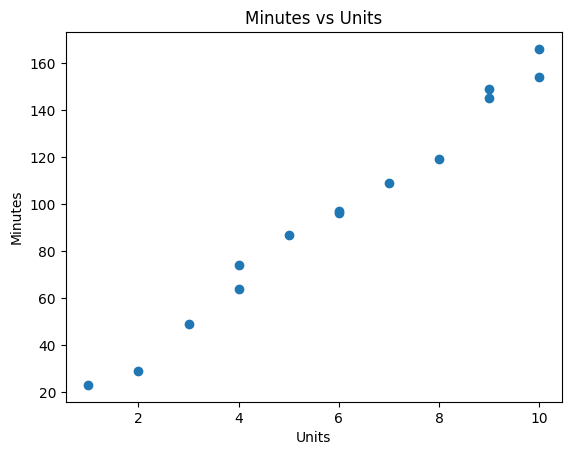

In [2]:
#plotting the actual time taken for various values of number of faulty units
plt.scatter(pc["Units"], pc["Minutes"])
plt.xlabel("Units")
plt.ylabel("Minutes")
plt.title("Minutes vs Units")

In [3]:
# Calculating the Least Square Estimators of Regression Parameters
x = pc.Units
y = pc.Minutes

xiyi = x*y
n = len(pc)

xmean = pc.Units.mean()
ymean = pc.Minutes.mean()

numerator = xiyi.sum() - n*xmean*ymean
denominator = (x**2).sum() - n*(xmean**2)
m = numerator/denominator
c = ymean - (m*xmean)
print('intercept : ',c,' coefficient : ',m)

intercept :  4.161654135338296  coefficient :  15.508771929824569


In [4]:
#using the best fit model to predict the target for unseen data
## Estimating time using the intercept and the coefficient of the best fit model
min_best_fit_model = c + m*pc.Units

#Adding the predicted values to the dataset
pc['min_best_fit_model'] = min_best_fit_model

#Printing the values predicted by the best fit model
pc[['Units','Minutes','min_best_fit_model']]

,Units,Minutes,min_best_fit_model
0,1,23,19.670426
1,2,29,35.179198
2,3,49,50.687970
3,4,64,66.196742
4,4,74,66.196742
5,5,87,81.705514
6,6,96,97.214286
7,6,97,97.214286
8,7,109,112.723058
9,8,119,128.231830


In [9]:
# building the statistics model
import statsmodels.api as sm
X = sm.add_constant(pc[['Units']])
y = pc["Minutes"]
#Regression model using Ordinary Least Squares
model = sm.OLS(y, X).fit()

#Obtain the statistical parameters
model.summary()

C:\Users\Naomie  Fillies\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=14 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Minutes   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           8.92e-13
Time:                        18:13:25   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1617      3.355      1.240      0.239      -3.148      11.472
Units         15.5088      0.505     30.712      0.000      14.409      16.609
==============================================================================
Omnibus:                        0.746   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.689   Jarque-Bera (JB):                0.624
Skew:                          -0.069   Prob(JB):                        0.732
Kurtosis:                       1.975   Cond. No.                         15.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#calculating the coefficient of determination R2 for the best fit model on the computers dataset
SST = sum((pc.Minutes.mean() - pc.Minutes)**2)
print('SST: ', SST)

SSE = sum(min_best_fit_model**2)
print('SSE: ',SSE)

Rsq = (SST/SSE)/SST
print('Rsq: ',Rsq)

SST:  27768.35714285714
SSE:  159728.1516290727
Rsq:  6.260637150063824e-06


In [23]:
# standard deviation of residuals
residual_error=pc["Minutes"]-predictions
sd=np.sqrt(np.sum(np.square(residual_error))/(residual_error.size-2))
# standardised residuals
sd_error=residual_error/sd
sq_abs_sd_err=np.sqrt(np.abs(sd_error))
plt.figure(figsize=(7,7))
sns.regplot(predictions.reshape(-1),sq_abs_sd_err, scatter=True, lowess=True,
           line_kws={'color':'red', 'lw':1, 'alpha':1})
plt.xlabel("Fitted value")
plt.ylabel("Standardized residuals")


NameError: name 'predictions' is not defined

In [27]:
import seaborn as sns
sns.residplot('Units','Minutes',data=pc,lowess=True, line_kws={'color':'red', 'lw':1, 'alpha':1})
plt.xlabel("Units")
plt.title("Residual plot")


TypeError: residplot() got multiple values for argument 'data'